##ДЗ по МО##


Первая часть. Угадываем цену по описанию.

In [4]:
import pandas as pd

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
file = pd.read_csv('Shoes_Data.csv')

In [7]:
data = file
df = file[["reviews", "reviews_rating"]]

Удалим строчки с одинаковым описанием: это дубликаты.


In [9]:
data = data.drop_duplicates(subset = 'product_description')

Добавим столбец с длинной описания в символах.

In [10]:
data['text_len'] = data['product_description'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,text_len
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men,222
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men,78
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,398
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men,576
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men,1030
...,...,...,...,...,...,...,...,...,...
1193,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women,237
1194,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women,876
1195,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women,311
1196,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women,1629


Выглядит довольно странно... Средняя длина видимо несколько сотен, а вот выбросов много и они гигантские.


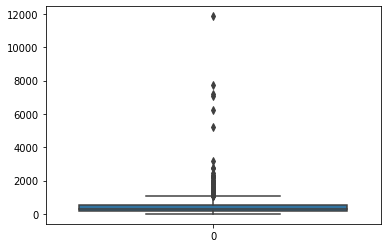

In [12]:
ax = sns.boxplot(data=data['text_len'])

Удалим стоп-слова, переведем описания в массивы из слов, которые туда входят.

In [13]:
import nltk

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [15]:
words = set(nltk.corpus.words.words())
list_stopwords = set(stopwords.words('english'))
data['product_description2'] = data['product_description'].str.lower()
data['product_description2'] = data['product_description2'].apply(word_tokenize)
data['product_description2'] = data['product_description2'].apply(lambda x: [word for word in x if word in words and word not in list_stopwords])
data['product_description2'] = data['product_description2'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
data['product_description2'] = data['product_description2'].apply(lambda x : [word for word in x if len(word) > 1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Посчитаем количество слов в описании.

In [16]:
data['words_num'] = data['product_description2'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Из цены удалим значок индийской рупии... и переведем ее в число

In [17]:
data['price']=data['price'].apply(lambda x: str(x).replace('₹','') if '₹' in str(x) else str(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
prices = [float(p) for p in data['price'].tolist()]
data['price'] = prices

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Посмотрим на распределения числа слов... Все еще так себе

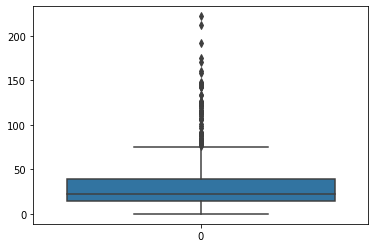

In [85]:
ax = sns.boxplot(data=data['words_num'])

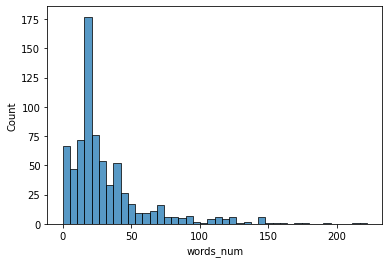

In [86]:
ax = sns.histplot(data=data['words_num'])

Что у нас есть из анализа данных?

*   убрали дубли по описаниям
*   токенизировали описания
*   добавили длину описания, по ней боксплот
*   посчитали число токенов, по ним боксплот и гистограмма



Теперь можно сказать, что все готово для МО. Погнали

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
import sklearn

Делаем векторизацию

In [88]:
corpus = [' '.join(i) for i in list(data['product_description2'])]
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)
y = data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state=42)

In [89]:
bow = CountVectorizer()
X_bow = bow.fit_transform(corpus)
y = data['price'].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X_bow, y, random_state=42)

линейная регрессия

In [26]:

import numpy as np
from sklearn.metrics import mean_squared_error

In [90]:
# на tfidf

lin_reg = LinearRegression()

linreg_params = {'fit_intercept': [True, False],
                 'normalize': [True, False]
                 }

grid_search1 = GridSearchCV(lin_reg,
                           param_grid=linreg_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search1.fit(X_train, y_train)

print('Best score: {}'.format(grid_search1.best_score_))
print('Best parameters: {}'.format(grid_search1.best_params_))

Best score: -1151.5068323487744
Best parameters: {'fit_intercept': True, 'normalize': True}


In [91]:
#на мешке слов
grid_search2 = GridSearchCV(lin_reg,
                           param_grid=linreg_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search2.fit(X2_train, y2_train)

print('Best score: {}'.format(grid_search2.best_score_))
print('Best parameters: {}'.format(grid_search2.best_params_))

Best score: -1858.127581420917
Best parameters: {'fit_intercept': True, 'normalize': True}


ридж


In [92]:
#на tfidf
regressor = Ridge()

ridge_params = {'alpha': [0.05, 0.1, 0.15, 0.5, 1, 2],
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'solver': ['auto', 'svd', 'cholesky',
                           'lsqr', 'sparse_cg', 'saga'],
                'random_state': [0]
                }

grid_search3 = GridSearchCV(regressor,
                           param_grid=ridge_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search3.fit(X_train, y_train)

print('Best score: {}'.format(grid_search3.best_score_))
print('Best parameters: {}'.format(grid_search3.best_params_))

Best score: -956.5045590190832
Best parameters: {'alpha': 1, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'solver': 'auto'}


In [93]:
#на каунтвекторайзере
grid_search4 = GridSearchCV(regressor,
                           param_grid=ridge_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search4.fit(X2_train, y2_train)

print('Best score: {}'.format(grid_search4.best_score_))
print('Best parameters: {}'.format(grid_search4.best_params_))

Best score: -981.3807331351958
Best parameters: {'alpha': 2, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'solver': 'auto'}


Итак, получилось что лучше всего работает ридж на тфидф векторайзере. В принципе это логично: ридж это улучшение линейной регрессии, а тфидф более продвинутый, чем каунтвекторайзер.

In [94]:
from sklearn.metrics import mean_absolute_error
preds = grid_search3.predict(X_test)
mean_absolute_error(y_test, preds)

886.0895393546297

Вот такая вот средняя ошибка получается!

Проанализируем результаты.

Построим графчичек

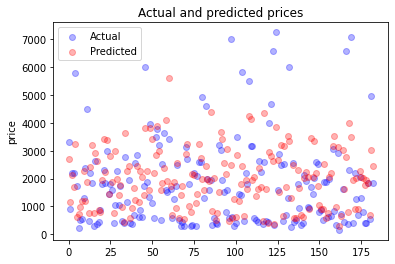

In [95]:
_, ax = plt.subplots()

ax.scatter(x=range(0, y_test.size), y=y_test,
           c='blue', label='Actual', alpha=0.3)
ax.scatter(x=range(0, preds.size), y=preds,
           c='red', label='Predicted', alpha=0.3)

plt.title('Actual and predicted prices')
plt.ylabel('price')
plt.legend()
plt.show()

Ладно, ничего не понятно, кроме того, что когда реальная цена большая, то это плохо угадывается, посмотрим вблизи

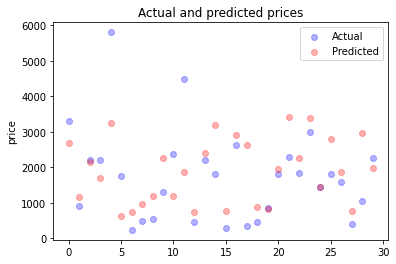

In [97]:
_, ax = plt.subplots()

ax.scatter(x=range(0, 30), y=y_test[0:30],
           c='blue', label='Actual', alpha=0.3)
ax.scatter(x=range(0, 30), y=preds[0:30],
           c='red', label='Predicted', alpha=0.3)

plt.title('Actual and predicted prices')
plt.ylabel('price')
plt.legend()
plt.show()

Ладно, тут ничего нового, посмотрим тогда на распределение разности предикшна и реальной цены

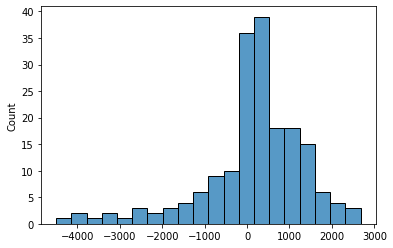

In [98]:
difs = []
for i in range(y_test.size):
  difs.append(preds[i]-y_test[i])

ax = sns.histplot(data=difs)

Ну, вот: мы видим что довольно многое угадалось неплохо, а распределения выглядят по-разному слева и справа: положительная разница получается для дешевых моделей, которые определили как более дорогие, и таких много, но разность меньше. А дорогих моделей, которые определили как дешевые для каждой разности мало, зато больше разброс расстояний между реальной ценой и угаданной.

In [104]:
good_predicted = []
for i in range(len(difs)):
  if difs[i] > -100 and difs[i] < 100:
    good_predicted.append(y_test[i])

print(min(good_predicted))
print(max(good_predicted))

319.0
3079.0


Я попробовала предположить что хорошо угаданные будут в маленьком ценовом диапазоне, но это не так - разница в 100 есть и у кроссовок за 319, и у кроссовок за 3079...

Итак, вывод: модель хорошо работает ИНОГДА, чуть чаще на недорогих кроссовках.

## Перейдем к задаче номер 2...

Очень удачно, что прямо на кегле можно посмотреть как обработать данные для этой задачи))))

сначала делаем датафрейм отдельный из комментариев и рейтингов

In [42]:
rew  = []
rat = []

for j in df.index:
    lst = [i for i in df.iloc[j].reviews.split('||')]
    for k in lst:
        rew.append(k)
        
for j in df.index:
    lst = [i for i in df.iloc[j].reviews_rating.split('||')]
    for k in lst:
        rat.append(k)
        
df = pd.DataFrame(list(zip(rew, rat)),
               columns =['Review', 'Review_rating'])

In [43]:
df.head()

,Review,Review_rating
0,Not happy with product,1.0 out of 5 stars
1,It's not as expected.,1.0 out of 5 stars
2,AVERAGE PRODUCT,3.0 out of 5 stars
3,Pic more beautiful,3.0 out of 5 stars
4,Got damage product. But quality is average fo...,3.0 out of 5 stars


Теперь удаляем все ненужное

In [44]:
import re

def lower(text):
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('','', punctuation))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

# Removing all words with digits and standalone digits
def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Removing all non-printable symbols like "ड", "ட"
def remove_non_printable(text):
    text = text.encode("ascii", "ignore")
    return text.decode()
        
# One function to clean it all
def clean_text(text):
    text = lower(text)
    text = remove_punctuation(text)
    #text = remove_stopwords(text)
    text = remove_digits(text)
    text = remove_emoji(text)
    text = remove_non_printable(text)
    return text

Ну и собираем красиво

In [45]:
def get_first_digit(text):
    match = re.search(r'\d', text)
    return match[0]

In [46]:
df['Review_rating']=df['Review_rating'].apply(get_first_digit)
df['clean_review']=df['Review'].apply(clean_text)
df.head()

,Review,Review_rating,clean_review
0,Not happy with product,1,not happy with product
1,It's not as expected.,1,its not as expected
2,AVERAGE PRODUCT,3,average product
3,Pic more beautiful,3,pic more beautiful
4,Got damage product. But quality is average fo...,3,got damage product but quality is average for


Пора посмотреть, что получилось. Сколько каких рейтингов?

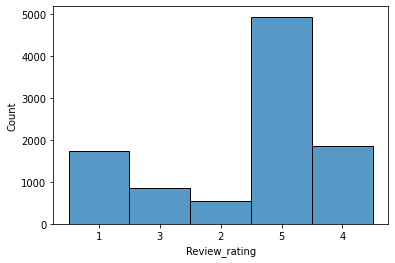

In [106]:
ax = sns.histplot(data=df['Review_rating'])

5-ок сильно больше чем всего остального.

Не знаю, куда еще можно посмотреть, поэтому поехали дальше

Сделаем векторизацию

In [47]:
corpus2 = [i for i in list(df['clean_review'])]
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus2)
y = df['Review_rating'].values
X3_train, X3_test, y3_train, y3_test = train_test_split(X_tfidf, y, random_state=42)
bow = CountVectorizer()
X_bow = bow.fit_transform(corpus2)
y_bow = df['Review_rating'].values
X4_train, X4_test, y4_train, y4_test = train_test_split(X_bow, y_bow, random_state=42)


Теперь будем делать МО и выбирать лучшую модель и лучшие параметры

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [68]:
logreg = LogisticRegression(max_iter=400)

logreg_params = {'C': [0.5, 1.0, 1.5, 2.0],
                 'penalty' : ['l2', 'l1'],
                 'solver' : ['liblinear', 'saga'],
                 'fit_intercept': [True, False],
                 'class_weight': ['balanced', None],
                 'random_state': [0]}

logreg_cv = GridSearchCV(logreg,
                         param_grid=logreg_params,
                         cv=5,
                         n_jobs=-1)

logreg_cv.fit(X3_train, y3_train)

print('Best score: {}'.format(logreg_cv.best_score_))
print('Best parameters: {}'.format(logreg_cv.best_params_))

Best score: 0.6454190057842444
Best parameters: {'C': 2.0, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}


In [69]:
logreg_cv2 = GridSearchCV(logreg,
                         param_grid=logreg_params,
                         cv=5,
                         n_jobs=-1)

logreg_cv2.fit(X4_train, y4_train)

print('Best score: {}'.format(logreg_cv2.best_score_))
print('Best parameters: {}'.format(logreg_cv2.best_params_))

Best score: 0.6523819771158759
Best parameters: {'C': 2.0, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}


In [57]:
mnb = MultinomialNB()

mnb_params = {'alpha': [0.1, 0.5, 1.0, 1.5]}

mnb_cv = GridSearchCV(mnb,
                      param_grid=mnb_params,
                      cv=5,
                      n_jobs=-1)

mnb_cv.fit(X3_train, y3_train)

print('Best score: {}'.format(mnb_cv.best_score_))
print('Best parameters: {}'.format(mnb_cv.best_params_))

Best score: 0.6348411282997585
Best parameters: {'alpha': 0.5}


In [62]:
mnb_cv2 = GridSearchCV(mnb,
                      param_grid=mnb_params,
                      cv=5,
                      n_jobs=-1)

mnb_cv2.fit(X4_train, y4_train)

print('Best score: {}'.format(mnb_cv2.best_score_))
print('Best parameters: {}'.format(mnb_cv2.best_params_))

Best score: 0.636982670579617
Best parameters: {'alpha': 0.5}


Лучше всего работает Байес с тфидф. Запустим его на тесте.

In [111]:
from sklearn.metrics import accuracy_score

In [113]:
preds2 = mnb_cv.predict(X3_test)
acc = accuracy_score(preds2, y3_test)

In [114]:
acc

0.6558232931726907

Построим confusion matrix

In [109]:
from sklearn.metrics import confusion_matrix

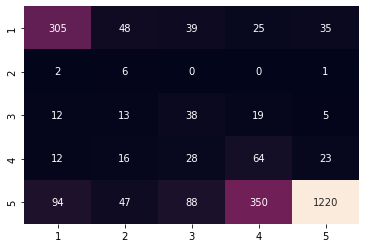

In [116]:
sns.heatmap(data=confusion_matrix(preds2, y3_test),
            annot=True, fmt='d', cbar=False,
            xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])

Эххх, ну хорошо определяются отзывы с рейтингом 5 (что неудивительно, ведь их больше всего). И нормально определяются самые плохие. В принципе, это логично: полюса всегда отличить легче. Все остальное работает плохо)))) Например, отзывы на 5 и на 1 часто путаются. Но наверное это можно объяснить тем, что в них часто используются похожие слова: например, про качество будут скорее писать в полярных отзывах, типа "качество зашибись" и "качество ужасное".